In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset
customer_data = pd.read_csv('F:/Python/Ostad Python/Jupyter notebook/Mall_Customers.csv')

# Display first few rows
print(customer_data.head())

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [5]:
customer_data.shape

(200, 5)

In [9]:
customer_data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# Data Preprocessing
# Check for missing values
print(customer_data.isnull().sum())

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

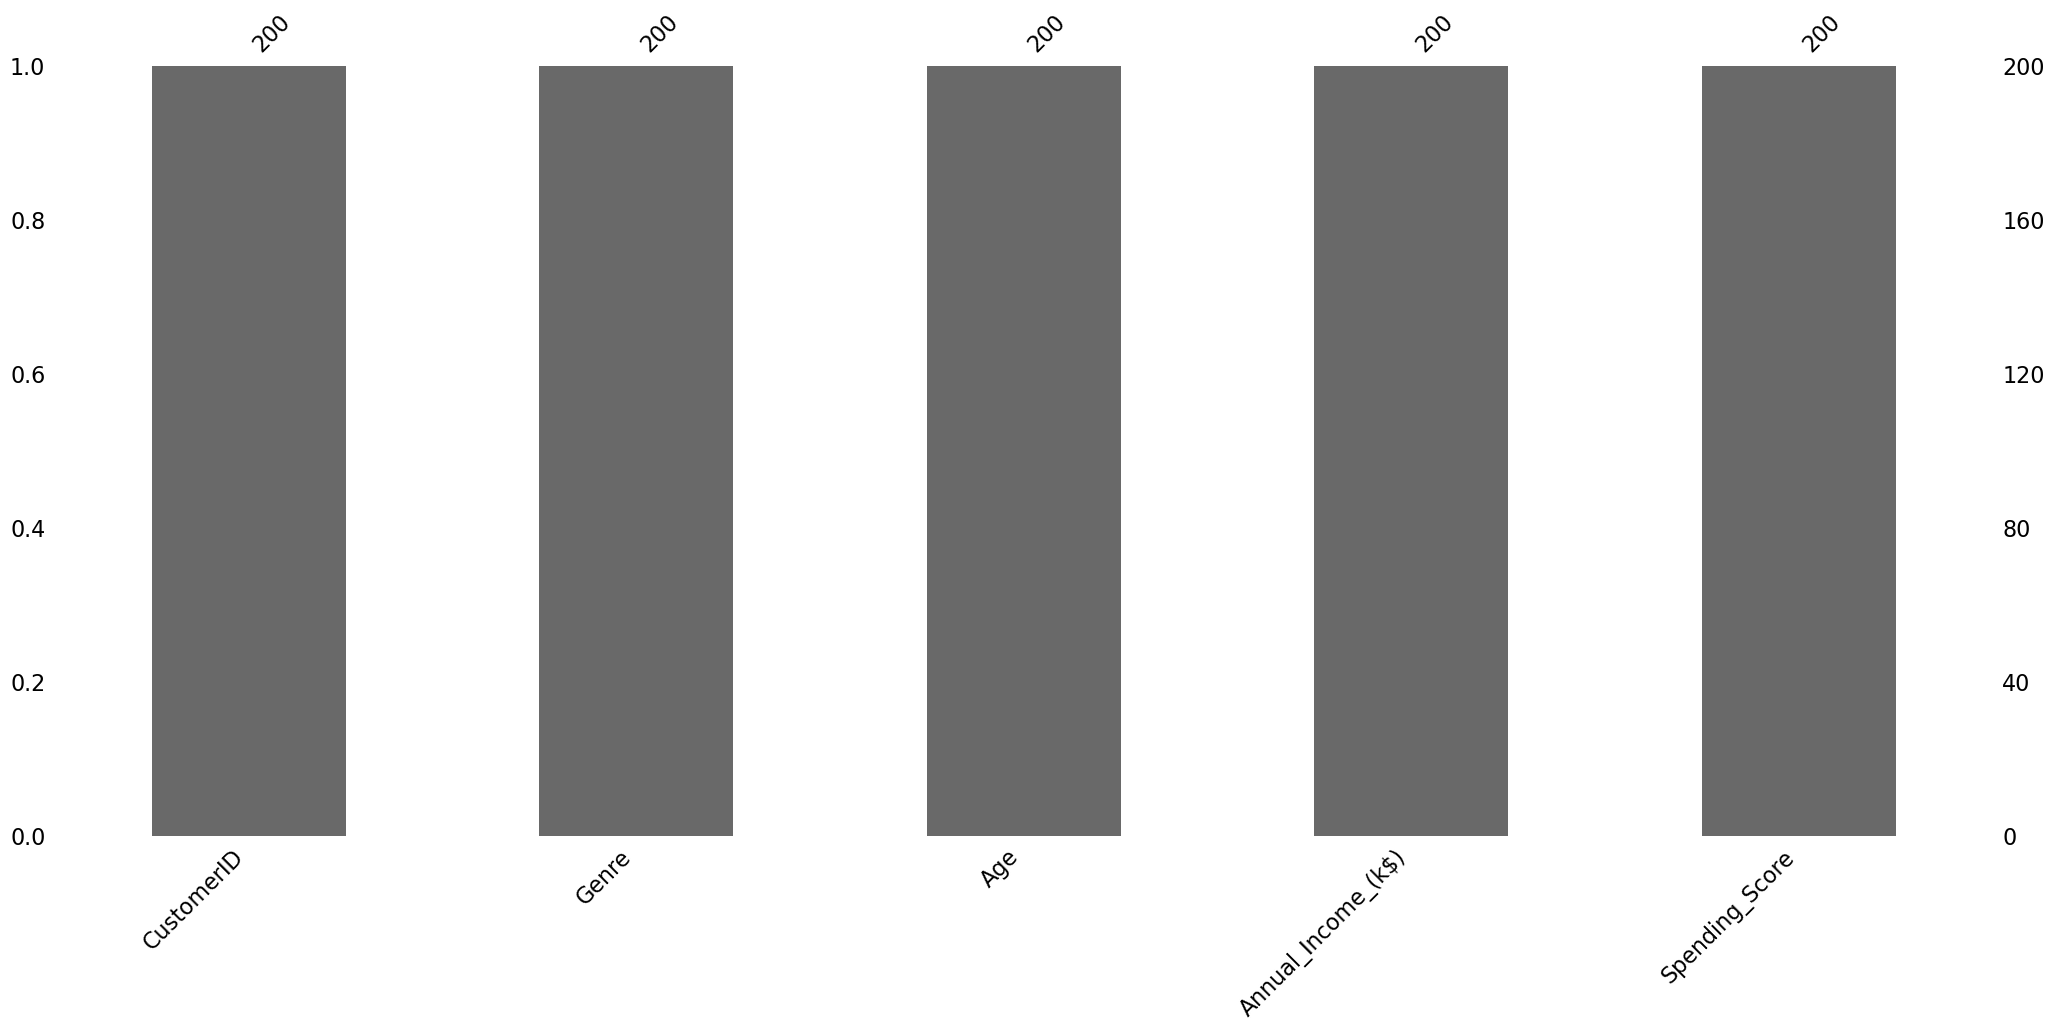

In [13]:
import missingno as msno
msno.bar(customer_data) #or msno.matrix(customer_data)

In [15]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [17]:
customer_data.rename(columns={'Genre':'Gender','Annual_Income_(k$)':'Annual_Income'},inplace=True)

In [19]:
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## Data Visualization

Text(0, 0.5, 'Count')

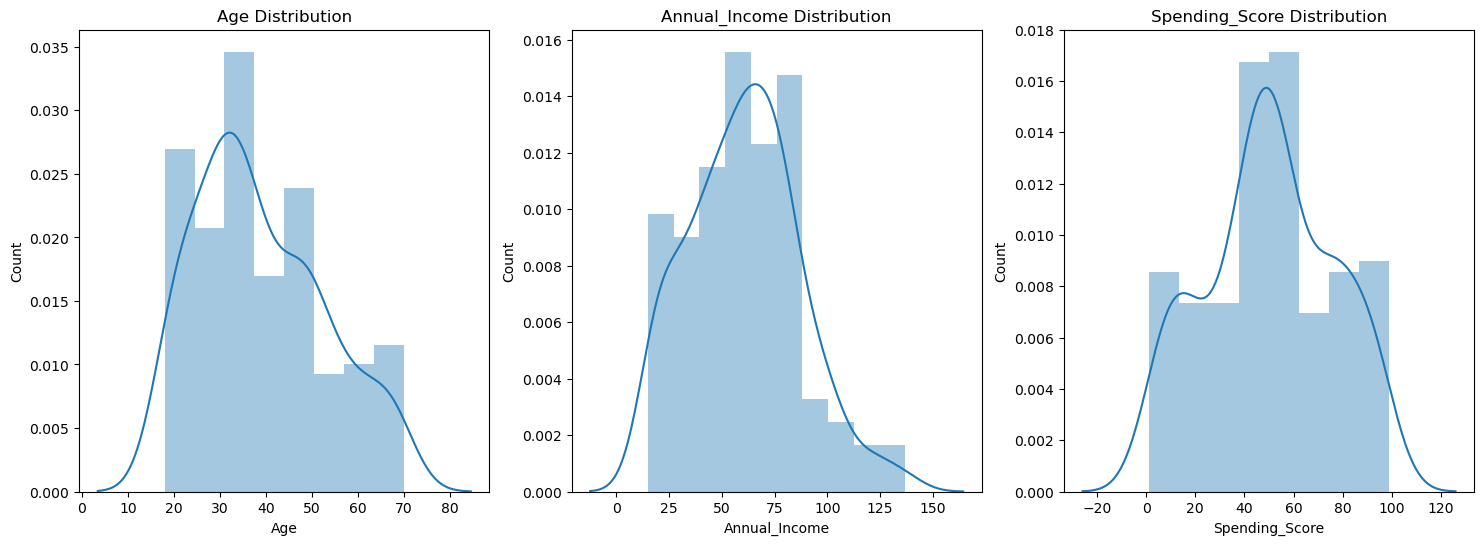

In [21]:
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
sns.distplot(customer_data['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,3,2)
sns.distplot(customer_data['Annual_Income'])
plt.title('Annual_Income Distribution')
plt.xlabel('Annual_Income')
plt.ylabel('Count')

plt.subplot(1,3,3)
sns.distplot(customer_data['Spending_Score'])
plt.title('Spending_Score Distribution')
plt.xlabel('Spending_Score')
plt.ylabel('Count')

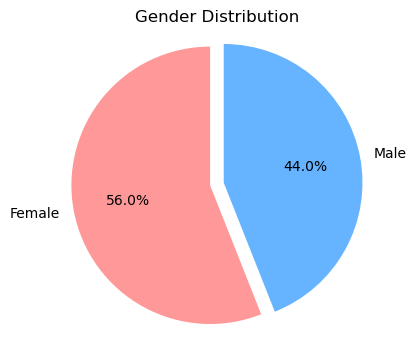

In [23]:
# Group the data by 'Gender' and count the sizes
sizes = customer_data.groupby('Gender').size()
# Ensure labels are taken from the index of the grouped data
labels = sizes.index

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0), startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Display the plot
plt.show()

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Spending_Score'}>]], dtype=object)

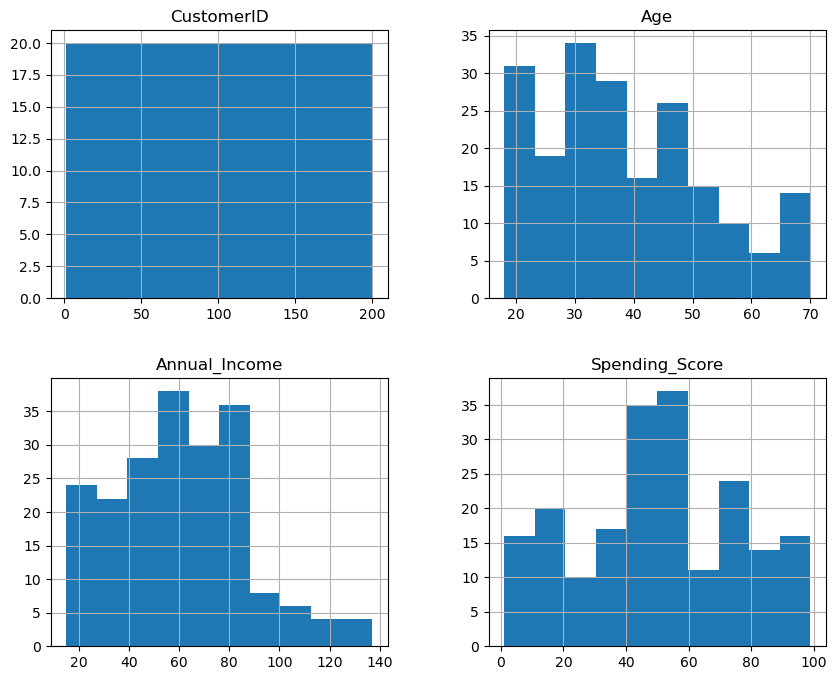

In [23]:
 customer_data.hist(figsize=(10,8))

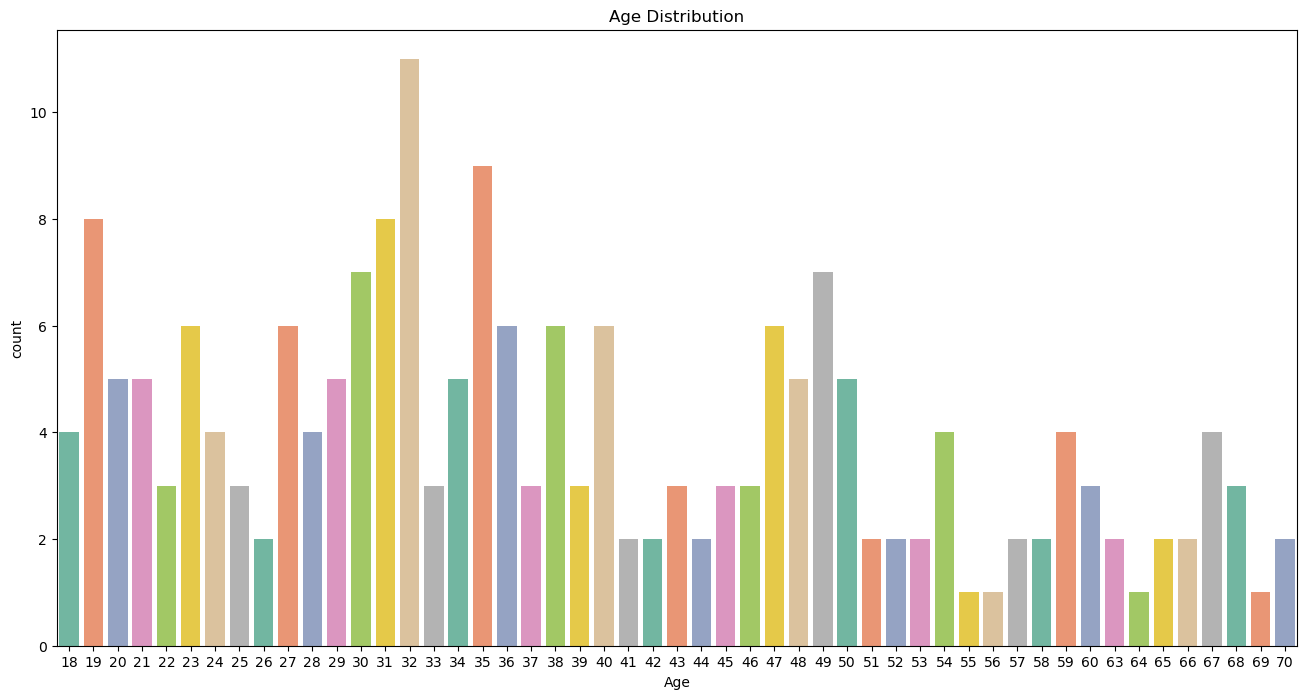

In [25]:
# Assuming 'Age' is categorical or binned into categories
plt.figure(figsize=(16, 8))

# Create the countplot with a color palette
sns.countplot(x=customer_data['Age'], palette='Set2')  # You can replace 'Set2' with other palettes like 'Blues', 'viridis', etc.

# Add a title to the plot
plt.title('Age Distribution')

# Display the plot
plt.show()

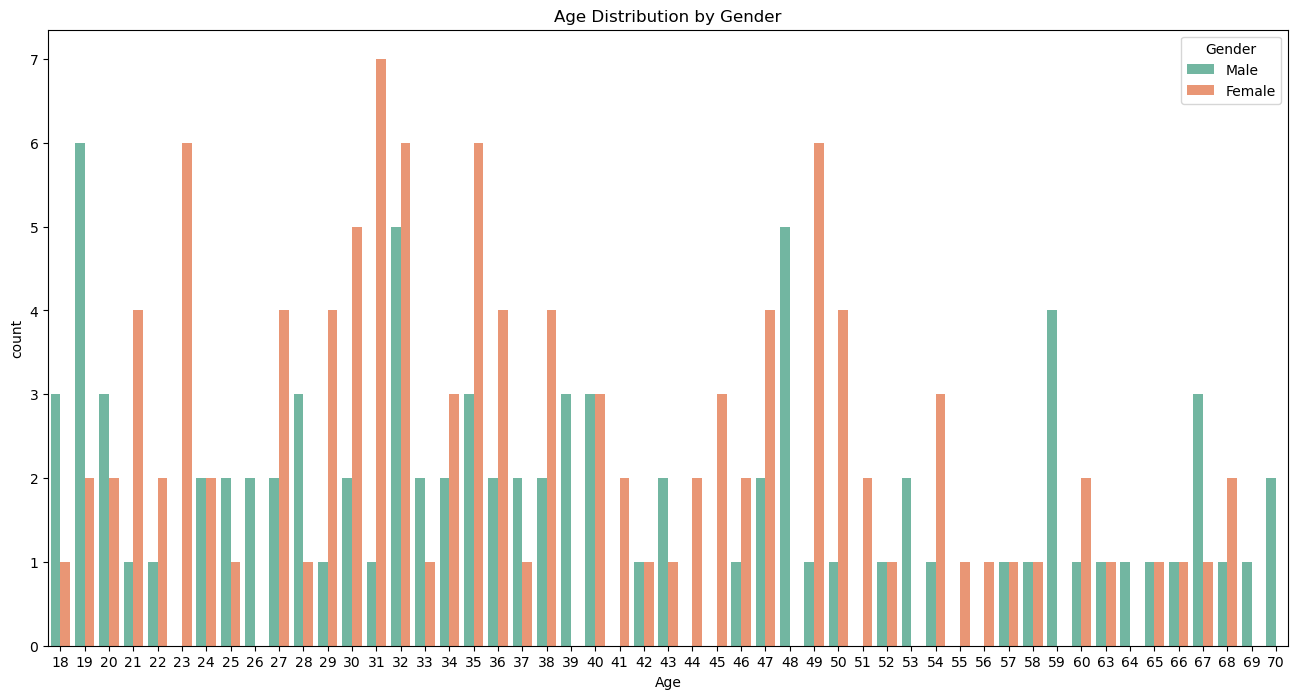

In [260]:
# Assuming 'Age' is categorical or binned into categories, and 'Gender' is the hue
plt.figure(figsize=(16, 8))

# Create the countplot with a 'hue' to differentiate by gender
sns.countplot(x='Age', hue='Gender', data=customer_data, palette='Set2')

# Add a title to the plot
plt.title('Age Distribution by Gender')

# Display the plot
plt.show()

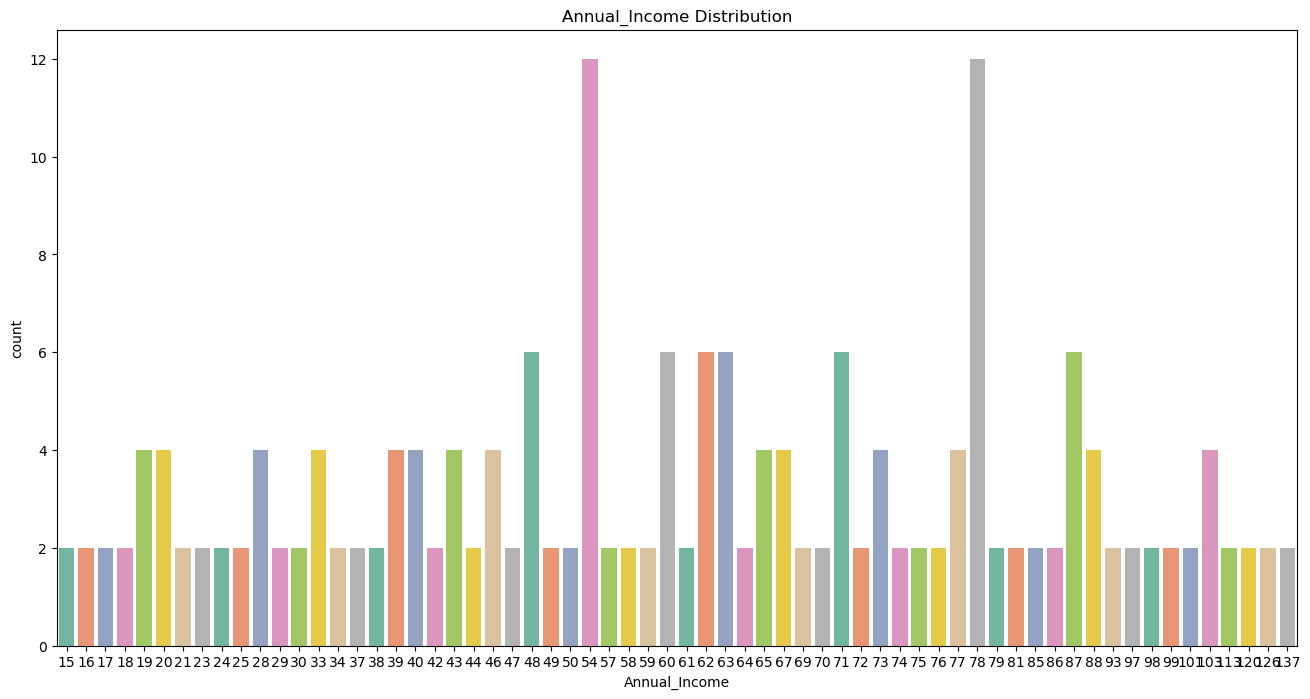

In [27]:
# Assuming 'Age' is categorical or binned into categories
plt.figure(figsize=(16, 8))

# Create the countplot with a color palette
sns.countplot(x=customer_data['Annual_Income'], palette='Set2')  # You can replace 'Set2' with other palettes like 'Blues', 'viridis', etc.

# Add a title to the plot
plt.title('Annual_Income Distribution')

# Display the plot
plt.show()

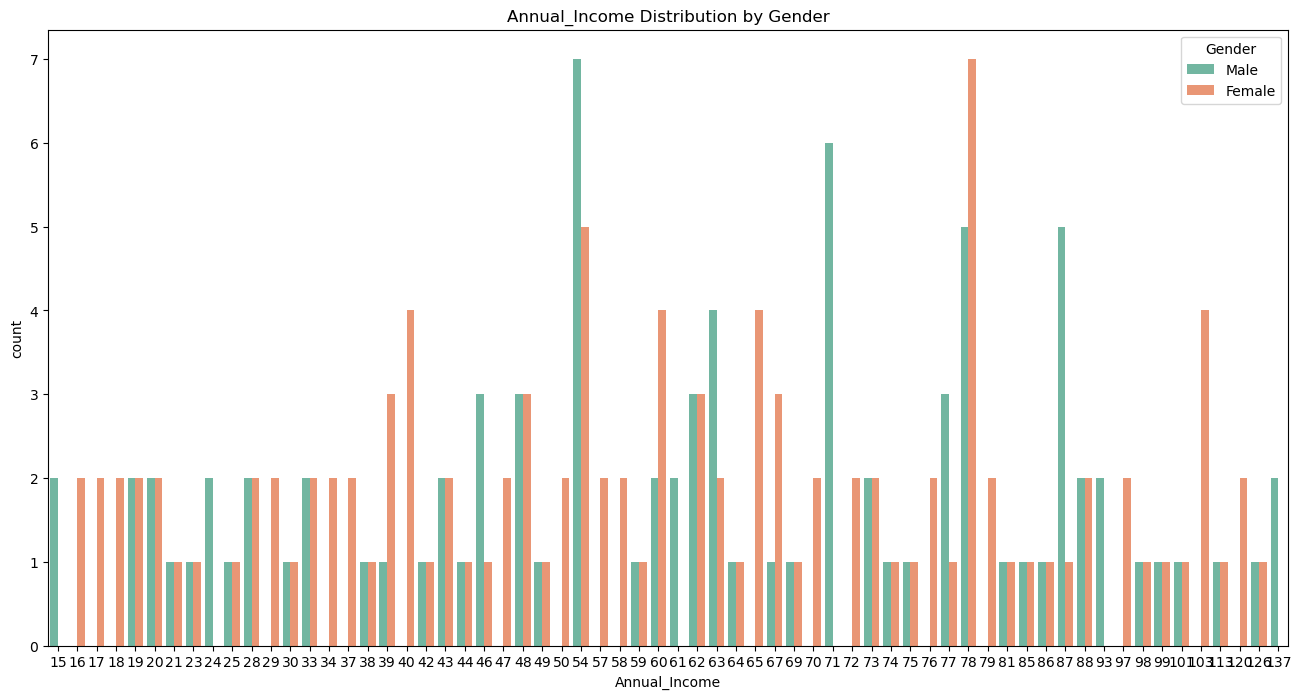

In [29]:
# Assuming 'Age' is categorical or binned into categories, and 'Gender' is the hue
plt.figure(figsize=(16, 8))

# Create the countplot with a 'hue' to differentiate by gender
sns.countplot(x='Annual_Income', hue='Gender', data=customer_data, palette='Set2')

# Add a title to the plot
plt.title('Annual_Income Distribution by Gender')

# Display the plot
plt.show()

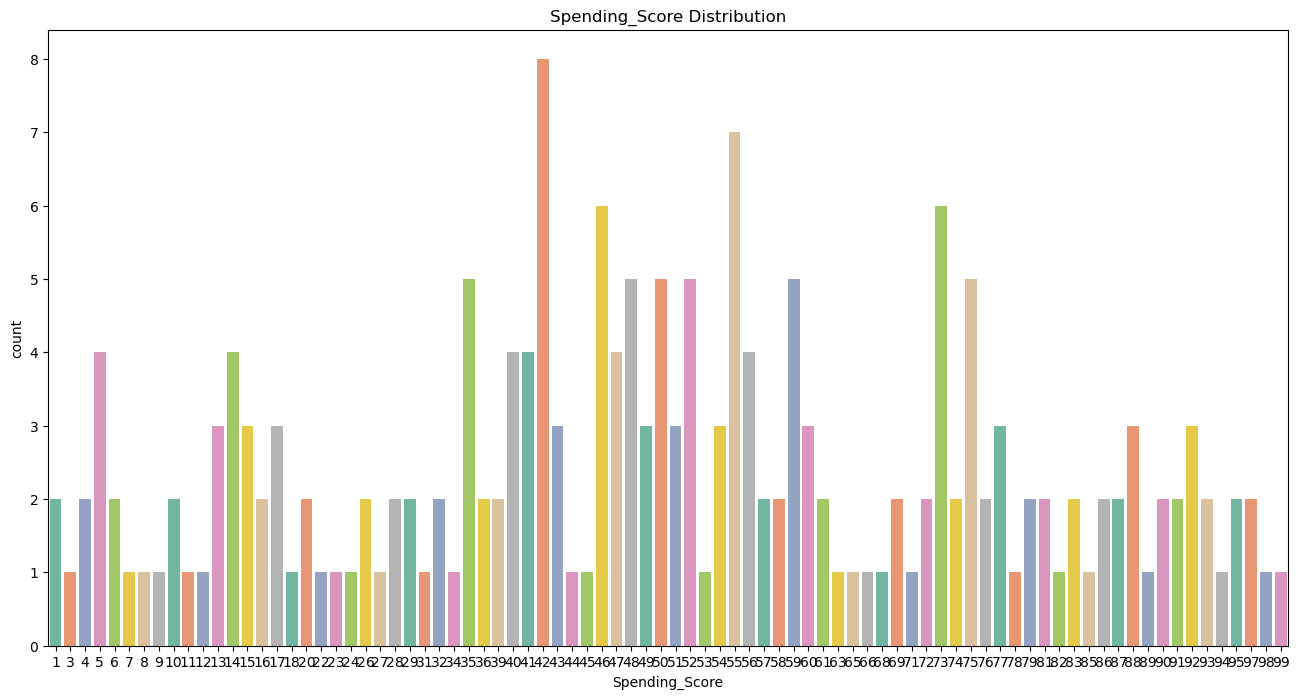

In [31]:
# Assuming 'Age' is categorical or binned into categories
plt.figure(figsize=(16, 8))

# Create the countplot with a color palette
sns.countplot(x=customer_data['Spending_Score'], palette='Set2')  # You can replace 'Set2' with other palettes like 'Blues', 'viridis', etc.

# Add a title to the plot
plt.title('Spending_Score Distribution')

# Display the plot
plt.show()

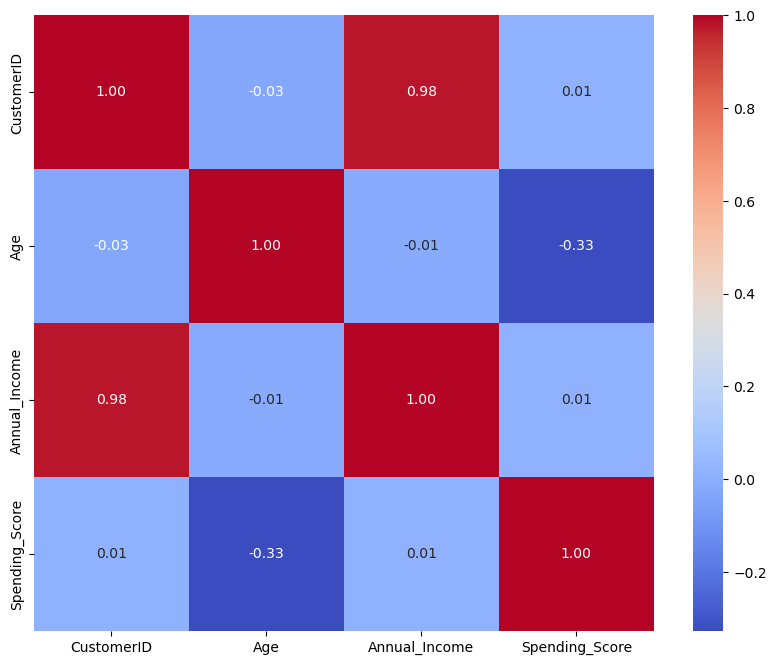

In [43]:
# Select only numeric columns from the DataFrame
numeric_data = customer_data.select_dtypes(include=['float64', 'int64'])
# Create the heatmap of correlations for the numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

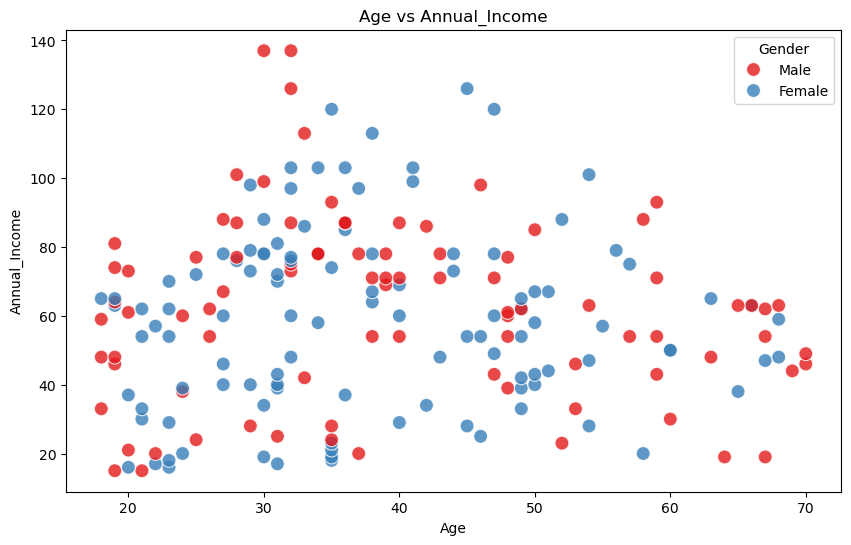

In [35]:
# Assuming customer_data has 'Age', 'Annual_Income', and 'Gender' columns
plt.figure(figsize=(10, 6))

# Create a scatter plot with segregation by 'Gender'
sns.scatterplot(x='Age', y='Annual_Income', data=customer_data, hue='Gender', palette='Set1',s=100,alpha=0.8)

# Set title and labels
plt.title('Age vs Annual_Income')
plt.xlabel('Age')
plt.ylabel('Annual_Income')

# Show the plot
plt.show()

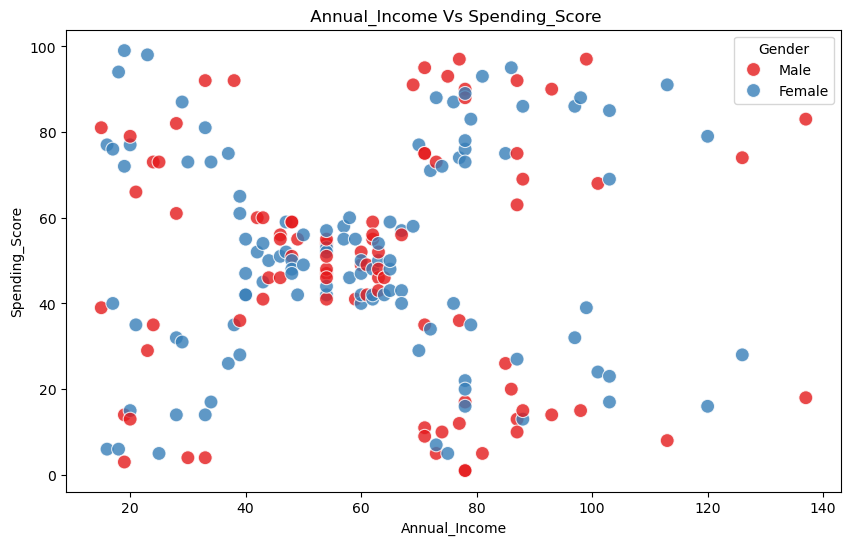

In [45]:
# Assuming customer_data has 'Age', 'Annual_Income', and 'Gender' columns
plt.figure(figsize=(10, 6))

# Create a scatter plot with segregation by 'Gender'
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=customer_data, hue='Gender', palette='Set1',s=100,alpha=0.8)

# Set title and labels
plt.title(' Annual_Income Vs Spending_Score')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')

# Show the plot
plt.show()

In [67]:
# Split the Data
x = customer_data.iloc[:,[3,4]].values  # Features
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [33]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [35]:
from sklearn.cluster import KMeans 

In [37]:
wcss = []  # List to store the WCSS (within-cluster sum of squares)
# Loop over K values from 1 to 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

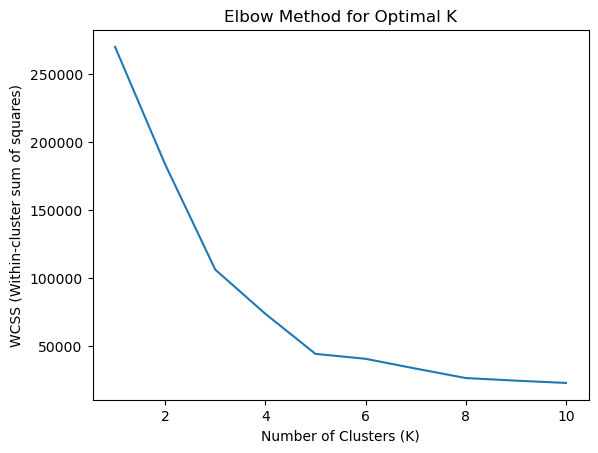

In [39]:
# Plot the Elbow method to determine the optimal K
plt.plot(range(1, 11), wcss)# marker='o'
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

In [41]:
from sklearn.metrics import silhouette_score
# Silhouette Score Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_scores.append(score)
print(silhouette_scores)

[0.39564531743995546, 0.46761358158775435, 0.4937945814354117, 0.553931997444648, 0.5128405328004378, 0.5017174409749505, 0.4962769338093321, 0.45587414130065596, 0.4426214845978157]


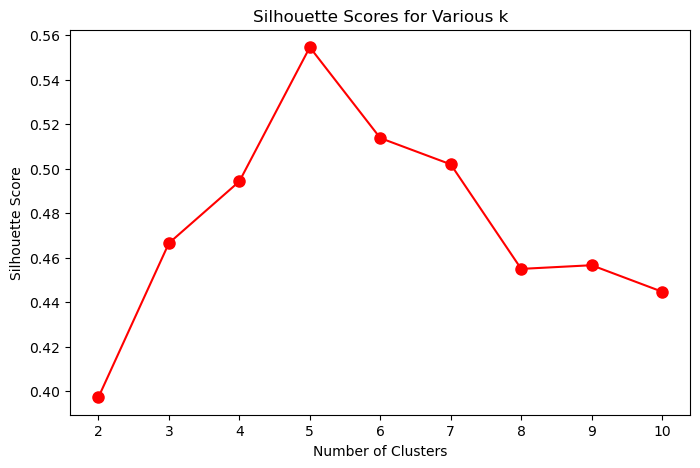

'\nIdentify the Peak:\nThe Silhouette Score reaches its highest value at k=5 with a score of 0.5539.\nAnalyze the Trend:\nIncreasing Scores: The scores increase from k=2 to k=5, indicating improving clustering performance up to k=5.\nDecreasing Scores: After k=5, the scores start to decrease, suggesting that adding more clusters might be leading to overfitting or splitting clusters unnecessarily.\nInterpret the Peak:\nThe peak score of 0.5539 at \nk=5 suggests that 5 clusters provide the best balance between cohesion and separation for the given data.\nThis score indicates moderately well-defined clusters. While not extremely high (closer to 1), it is the best among the evaluated options.\nContextual Considerations:\n\nDomain Knowledge: Consider whether having 5 clusters aligns with any domain-specific insights or expectations about the data.\nFurther Analysis: You might complement this analysis by visually inspecting the clusters or using additional metrics (like the elbow method) to 

In [247]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various k')
plt.show()
"""
Identify the Peak:
The Silhouette Score reaches its highest value at k=5 with a score of 0.5539.
Analyze the Trend:
Increasing Scores: The scores increase from k=2 to k=5, indicating improving clustering performance up to k=5.
Decreasing Scores: After k=5, the scores start to decrease, suggesting that adding more clusters might be leading to overfitting or splitting clusters unnecessarily.
Interpret the Peak:
The peak score of 0.5539 at 
k=5 suggests that 5 clusters provide the best balance between cohesion and separation for the given data.
This score indicates moderately well-defined clusters. While not extremely high (closer to 1), it is the best among the evaluated options.
Contextual Considerations:

Domain Knowledge: Consider whether having 5 clusters aligns with any domain-specific insights or expectations about the data.
Further Analysis: You might complement this analysis by visually inspecting the clusters or using additional metrics (like the elbow method) to confirm the choice of 
𝑘
Final Decision:
Based on the scores and their trend,k=5 appears to be the most appropriate choice for the number of clusters.
Conclusion:
The Silhouette Score analysis suggests that k=5 is the optimal number of clusters for your dataset."""

In [43]:
optimal_k = 5
model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
ymodel=model.fit_predict(x)

In [45]:
ymodel

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [81]:
# Add Cluster Labels to Dataset
customer_data['Cluster'] = kmeans.labels_

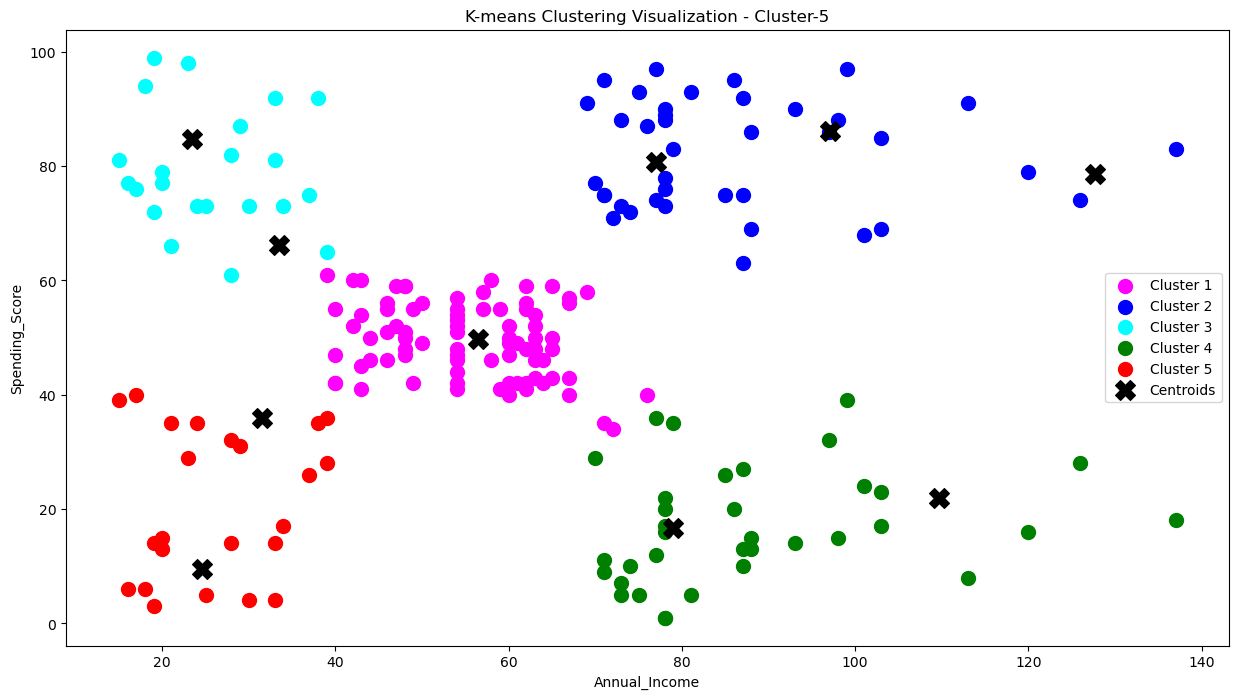

In [83]:
# List of colors for each cluster
colors = ['magenta', 'blue', 'cyan', 'green', 'red']

# Plot for Cluster 1
plt.figure(figsize=(15, 8))
plt.scatter(x [ymodel == 0, 0], x[ymodel == 0, 1], s=100, color=colors[0], label='Cluster 1')
plt.scatter(x[ymodel == 1, 0], x[ymodel == 1, 1], s=100, color=colors[1], label='Cluster 2')
plt.scatter(x[ymodel == 2, 0], x[ymodel == 2, 1], s=100, color=colors[2], label='Cluster 3')
plt.scatter(x[ymodel == 3, 0], x[ymodel == 3, 1], s=100, color=colors[3], label='Cluster 4')
plt.scatter(x[ymodel == 4, 0], x[ymodel == 4, 1], s=100, color=colors[4], label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.legend()
plt.title('K-means Clustering Visualization - Cluster-5')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

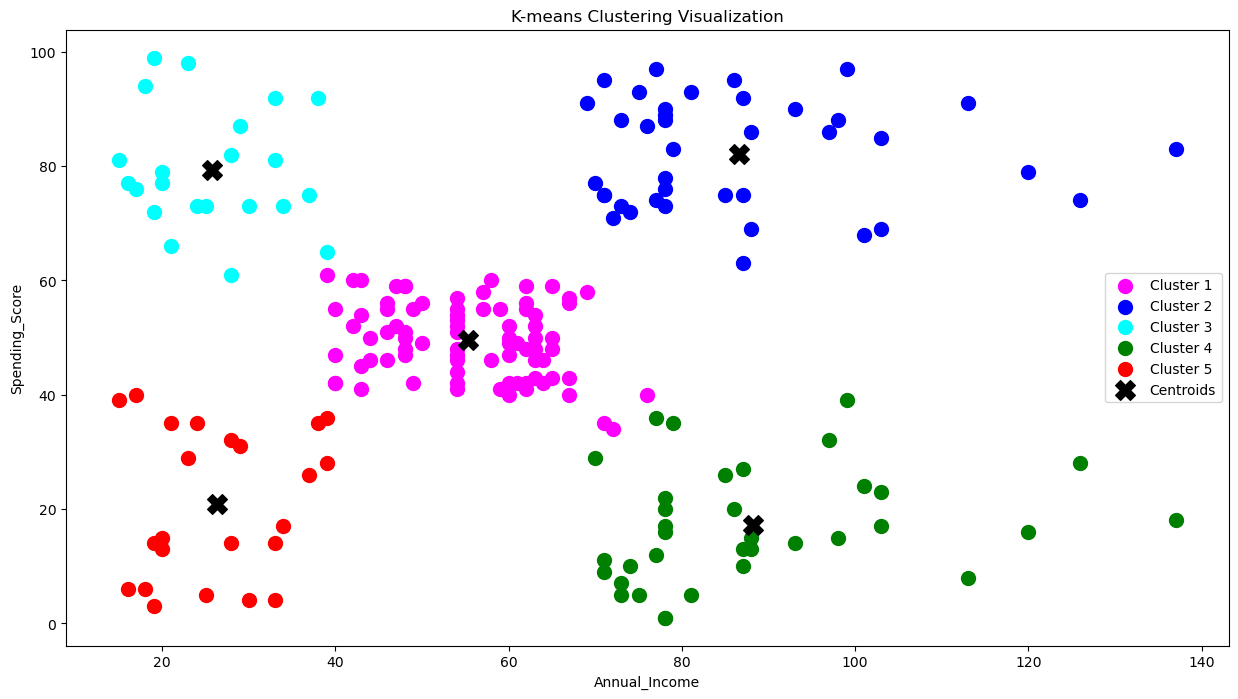

In [85]:
# Step 2: Visualize the clustering
plt.figure(figsize=(15, 8))

# List of colors for each cluster
colors = ['magenta', 'blue', 'cyan', 'green', 'red']

# Loop through each cluster and plot
for i in range(optimal_k):  # Assuming 5 clusters
    plt.scatter(x[ymodel == i, 0], x[ymodel == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')

# Add legend and show the plot
plt.legend()
plt.title('K-means Clustering Visualization')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')
plt.show()

In [87]:
# Step 8: Analyze Cluster Centroids
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['Spending_Spend','Annual_Income'])
print(centroid_df)
'''1. Spending vs. Income Relationship:
We can observe how spending correlates with income. For example, some individuals with higher incomes also show higher spending (e.g., Row 1 and Row 9), but others with lower income may still have relatively high spending (e.g., Row 2 and Row 7).
2. Identifying Outliers:
High Spending, Low Income: Row 2 and Row 7 have high spending relative to their low incomes, which could indicate outliers or specific spending patterns.
Low Spending, High Income: Row 3 shows lower spending despite having a higher income.
3. Clusters or Segments:
This data can help identify different groups of individuals:
High spenders, high income: E.g., Row 9.
High spenders, low income: E.g., Row 2.
Low spenders, high income: E.g., Row 3.
4. Potential Applications:
Marketing: Identify target groups for promotions based on spending habits.
Financial Planning: Understand which individuals may be overspending relative to their income.
5. Behavioral Insights:
Individuals with higher incomes do not always spend proportionately more, indicating varying spending behaviors across different income levels.
Conclusion:
This dataset provides a foundation for exploring financial behavior, identifying outliers, and segmenting individuals based on spending and income patterns.'''

   Spending_Spend  Annual_Income
0       56.464789      49.774648
1       97.090909      86.090909
2       79.000000      16.592593
3       23.428571      84.785714
4       24.583333       9.583333
5       76.960000      80.800000
6       31.533333      35.866667
7      109.700000      22.000000
8       33.500000      66.250000
9      127.666667      78.666667


'1. Spending vs. Income Relationship:\nWe can observe how spending correlates with income. For example, some individuals with higher incomes also show higher spending (e.g., Row 1 and Row 9), but others with lower income may still have relatively high spending (e.g., Row 2 and Row 7).\n2. Identifying Outliers:\nHigh Spending, Low Income: Row 2 and Row 7 have high spending relative to their low incomes, which could indicate outliers or specific spending patterns.\nLow Spending, High Income: Row 3 shows lower spending despite having a higher income.\n3. Clusters or Segments:\nThis data can help identify different groups of individuals:\nHigh spenders, high income: E.g., Row 9.\nHigh spenders, low income: E.g., Row 2.\nLow spenders, high income: E.g., Row 3.\n4. Potential Applications:\nMarketing: Identify target groups for promotions based on spending habits.\nFinancial Planning: Understand which individuals may be overspending relative to their income.\n5. Behavioral Insights:\nIndividu

In [89]:
# Step 9: Summary of Clusters
for i in range(optimal_k):
    print(f"Cluster {i} Summary:")
    print(customer_data[customer_data['Cluster'] == i][['Spending_Score', 'Annual_Income']].describe())


Cluster 0 Summary:
       Spending_Score  Annual_Income
count       71.000000      71.000000
mean        49.774648      56.464789
std          5.833884       7.708680
min         40.000000      42.000000
25%         46.000000      49.000000
50%         50.000000      58.000000
75%         55.000000      62.500000
max         60.000000      76.000000
Cluster 1 Summary:
       Spending_Score  Annual_Income
count       11.000000      11.000000
mean        86.090909      97.090909
std          9.470528       8.166450
min         68.000000      86.000000
25%         85.500000      90.500000
50%         88.000000      98.000000
75%         91.500000     102.000000
max         97.000000     113.000000
Cluster 2 Summary:
       Spending_Score  Annual_Income
count       27.000000       27.00000
mean        16.592593       79.00000
std         10.696007        6.46886
min          1.000000       70.00000
25%          9.500000       73.50000
50%         14.000000       78.00000
75%         24.000

## Predict New Value

In [105]:
# New input data
new_input_data = [[45,65]]
# Predict the cluster for the new input data
predicted_cluster = model.predict(new_input_data)
print(f"The input data belongs to cluster: {predicted_cluster[0]}")

The input data belongs to cluster: 0


## Model Save For Future Works

In [95]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [123]:
import joblib
joblib.dump(kmeans, 'kmeans_Customer_segmentation.pkl')

['kmeans_Customer_segmentation.pkl']

In [125]:
# Load the model later
kmeans = joblib.load('kmeans_Customer_segmentation.pkl')

In [91]:
# Save the results(simply used for daat saving)
#customer_data.to_csv('mall_customers_segmented.csv', index=False)